<a href="https://colab.research.google.com/github/musa-fe/Golden_Fibo/blob/main/GoldenFibo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fibonacci Düzeltme Seviyeleri ve Altın Oran
Ben bu projede teknik analiz kısmında kullanılan fib düzeltmesini seçtim. Çünkü altın oran ve altın oranın türevlerinden oluşan seviyelerden oluşuyor.

Bu seviyelerden en bilinen ve en çok dikkat çeken oran %61.8. Bu oran, altın oranla doğrudan ilişkilidir. Yani, Fibonacci dizisindeki iki ardışık sayının oranı alındığında (örneğin, 34/55) bu değer %61.8 olarak karşımıza çıkar. Altın oran, doğanın birçok yerinde karşımıza çıkan estetik bir orandır, bu yüzden finans dünyasında da çok fazla ilgi görüyor.

Diğer düzeltme seviyelerine gelirsek, bunlar aslında %61.8’in etrafında dönen ve onun türevleri gibi düşünebiliriz:

%38.2: Bu oran, altın oranın bir parçası. Dizi üzerindeki sayılardan biriyle ilişkili olarak hesaplanıyor.
%23.6: Yine Fibonacci dizisindeki başka bir sayı kombinasyonundan geliyor ve aslında %38.2'nin devamı gibi düşünebiliriz.
%78.6: Bu seviye de %61.8’in bir uzantısı. Yani %100’den %61.8 çıkarılıyor ve bu oran çıkıyor.

Şimdi bu projede bu seviyeleri test edip çalışıp çalışmadığını anlamaya çalışacağız.

In [56]:
symbol = "BTC-USD"
data = yf.download(symbol, start="2024-11-10", end="2025-04-10")

if data.empty:
    raise ValueError("Veri çekilemedi, tarih aralığını veya sembolü kontrol edin.")

[*********************100%***********************]  1 of 1 completed


#Trendi Belirle

In [57]:
high = float(data['High'].max())
low = float(data['Low'].min())
close_start = float(data['Close'].iloc[0])
close_end = float(data['Close'].iloc[-1])
trend = 'up' if close_end > close_start else 'down'

<ipython-input-57-3ea8724425c6>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  high = float(data['High'].max())
<ipython-input-57-3ea8724425c6>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  low = float(data['Low'].min())
<ipython-input-57-3ea8724425c6>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_start = float(data['Close'].iloc[0])
<ipython-input-57-3ea8724425c6>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_end = float(data['Close'].iloc[-1])


#Altın Oran Seviyelerini Belirle

In [62]:
def calculate_fibonacci_levels(high, low, direction='down'):
    if direction == 'down':
        return {
            0.236: high - 0.236 * (high - low),
            0.382: high - 0.382 * (high - low),
            0.618: high - 0.618 * (high - low),
            0.786: high - 0.786 * (high - low)
        }
    else:
        return {
            0.236: low + 0.236 * (high - low),
            0.382: low + 0.382 * (high - low),
            0.618: low + 0.618 * (high - low),
            0.786: low + 0.786 * (high - low)
        }

levels = calculate_fibonacci_levels(high, low, direction=trend)

In [63]:
def say_temassayisi(close_series, level_price, fark=50):
    temas_sayisi = 0
    icerde = False
    close_series = close_series.values
    for fiyat in close_series:
        if level_price - fark <= fiyat <= level_price + fark:
            if not icerde:
                temas_sayisi += 1
                icerde = True
        else:
            icerde = False
    return temas_sayisi

#Grafik

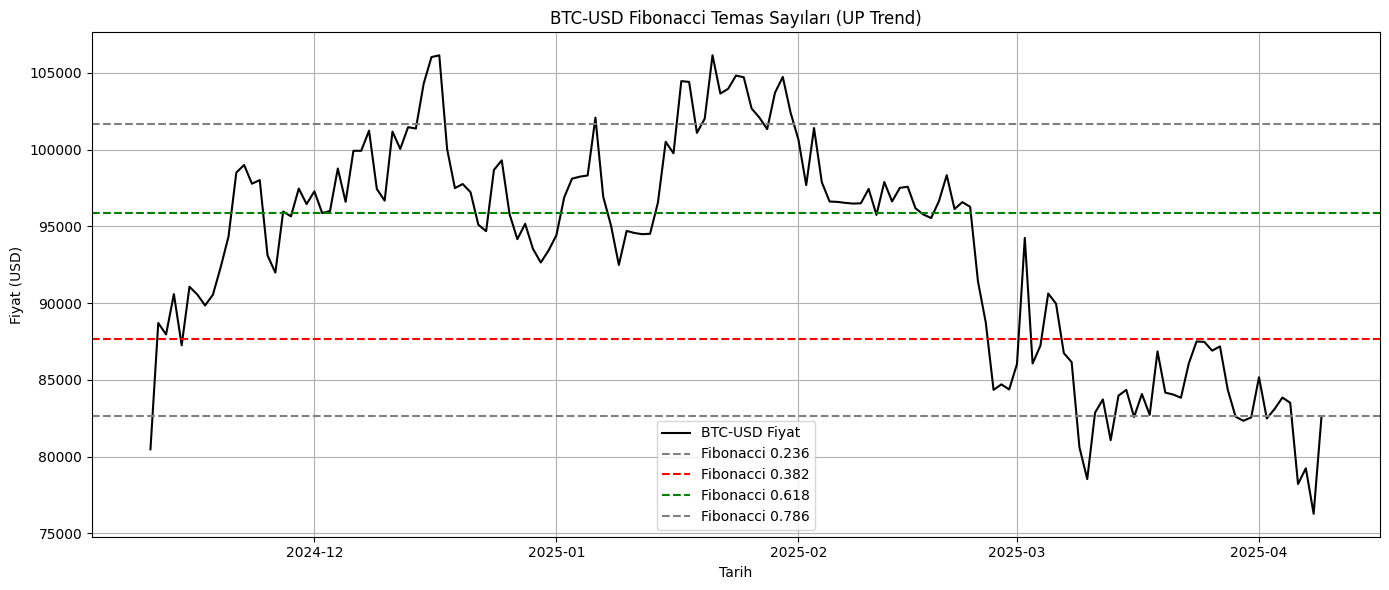

In [78]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label=f"{symbol} Fiyat", color='black')

temas_istatistik = {}

for level, price in levels.items():
    color = 'green' if level == 0.618 else 'red' if level == 0.382 else 'gray'
    plt.axhline(price, label=f"Fibonacci {level}", linestyle="--", color=color)
    temas_sayisi = say_temassayisi(data['Close'], price, fark=50)
    temas_istatistik[level] = temas_sayisi

plt.title(f"{symbol} Fibonacci Temas Sayıları ({trend.upper()} Trend)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
print("--- TEMAS SAYILARI (±50 USD) ---")
for level, sayi in temas_istatistik.items():
    print(f"Fibonacci {level} → {sayi} defa test edilmiş.")

--- TEMAS SAYILARI (±50 USD) ---
Fibonacci 0.236 → 3 defa test edilmiş.
Fibonacci 0.382 → 0 defa test edilmiş.
Fibonacci 0.618 → 1 defa test edilmiş.
Fibonacci 0.786 → 0 defa test edilmiş.


Güncel grafiktende teyit ettiğimizde, çektiğimiz fib düzeltmesinin ve fiyatların doğru olduğunu gözlemliyoruz

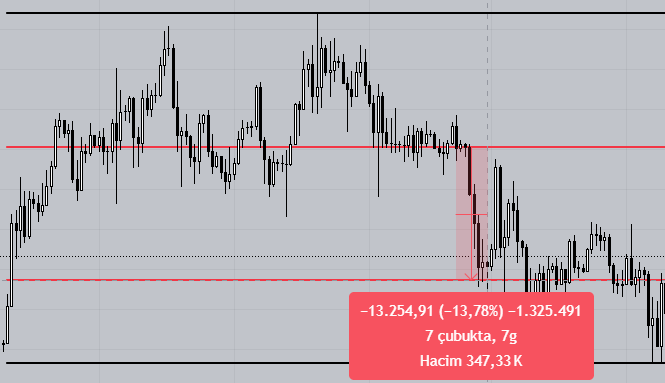

Burada asıl bakmamız gereken fiyat hareketi 96.274$ da gerçekleşmiş. İlk başta gelen yükseliz ve devamında yaşanılan akümülasyon seviyesini işaret ediyor. Ve bizim altın oran seviyesine denk gelen fiyat hareketi burayı kaybedince düşüş gösteriyor. Buda yaklaşık olarak %14 lük bir orana tekabül ediyor. Finansal piyasalar için oldukça iyi bir oran. Keza düşüş diğer bir altın oranımıza denk geliyor ve dikkatli incelenirse buradan da güzel bir tepki alıyor ve fiyat eski gücünü kazanmaya çalışıyor.

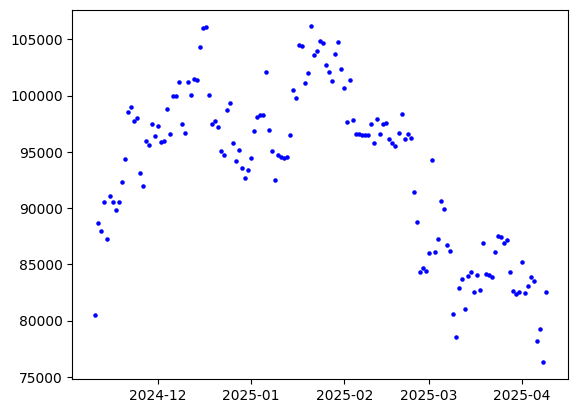

In [67]:
plt.scatter(data.index, data['Close'], s=5, color='blue')

#Peki başka grafiklerde bu geçerli mi?

In [53]:
symbol = "ETH-USD"
data = yf.download(symbol, start="2024-02-22", end="2024-07-23")

[*********************100%***********************]  1 of 1 completed


In [54]:
high = float(data['High'].max())
low = float(data['Low'].min())
close_start = float(data['Close'].iloc[0])
close_end = float(data['Close'].iloc[-1])
trend = 'up' if close_end > close_start else 'down'

<ipython-input-54-3ea8724425c6>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  high = float(data['High'].max())
<ipython-input-54-3ea8724425c6>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  low = float(data['Low'].min())
<ipython-input-54-3ea8724425c6>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_start = float(data['Close'].iloc[0])
<ipython-input-54-3ea8724425c6>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_end = float(data['Close'].iloc[-1])


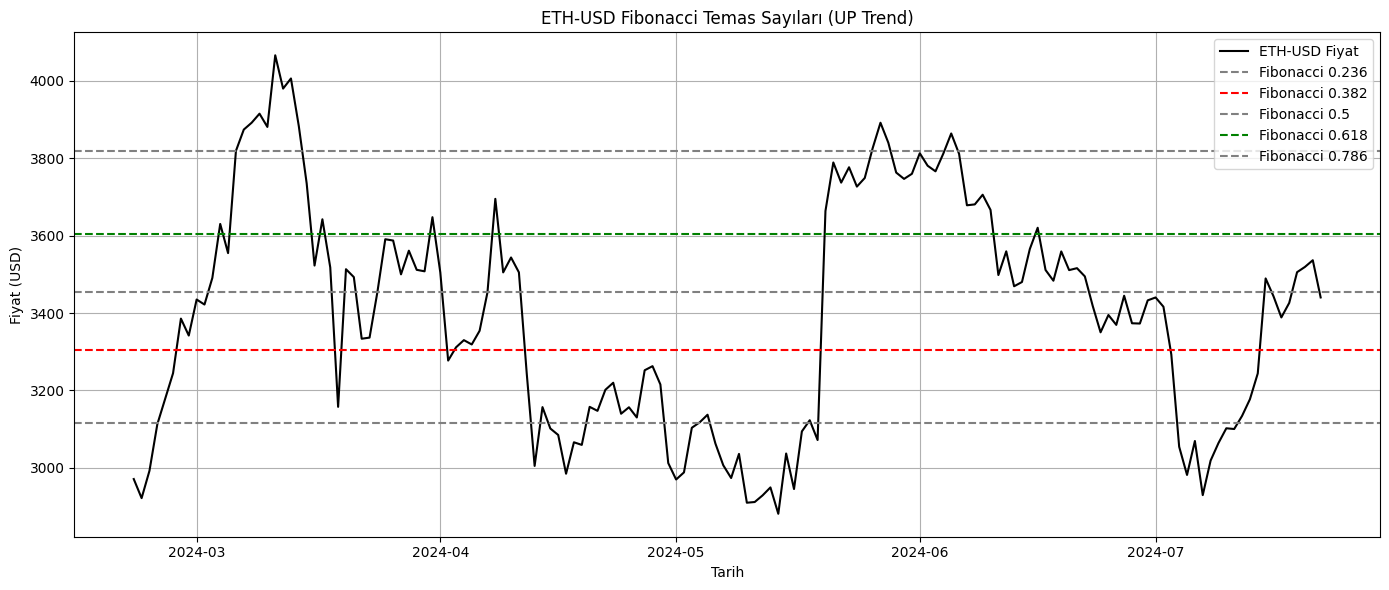

--- TEMAS SAYILARI (±50 USD) ---
Fibonacci 0.236 → 9 defa test edilmiş.
Fibonacci 0.382 → 6 defa test edilmiş.
Fibonacci 0.5 → 14 defa test edilmiş.
Fibonacci 0.618 → 8 defa test edilmiş.
Fibonacci 0.786 → 7 defa test edilmiş.


In [55]:
levels = calculate_fibonacci_levels(high, low, direction=trend)
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label=f"{symbol} Fiyat", color='black')

temas_istatistik = {}

for level, price in levels.items():
    color = 'green' if level == 0.618 else 'red' if level == 0.382 else 'gray'
    plt.axhline(price, label=f"Fibonacci {level}", linestyle="--", color=color)
    temas_sayisi = say_temassayisi(data['Close'], price, fark=50)
    temas_istatistik[level] = temas_sayisi

plt.title(f"{symbol} Fibonacci Temas Sayıları ({trend.upper()} Trend)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("--- TEMAS SAYILARI (±50 USD) ---")
for level, sayi in temas_istatistik.items():
    print(f"Fibonacci {level} → {sayi} defa test edilmiş.")

Bu grafikte de fiyat hareketinin yeşil çizgi bandında direnç olarak çalıştığını gözlemleyebiliriz. Özellikle 04 Nisan da bu direnç seviyesini kıramayan fiyatın yeni bir low yaptığını da gözlemliyoruz. Ve akabinde 0.236 seviyesine gelen türev altın oran çizgimizi kıran fiyatın bir başka türev altın fiyat olan 0.786 seviyelerine kadar yükseldiğini görebiliriz.

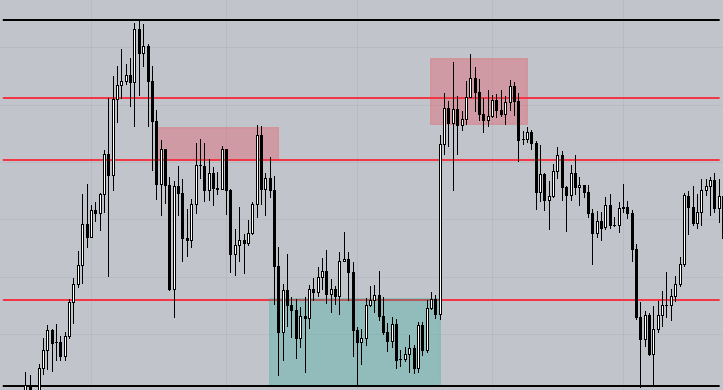

#SONUÇ

Finansal piyasalarda fiyat hareketlerini öngörmek çoğu zaman belirsizlik içerir. Ancak belirli teknik araçlar ve seviyeler aracılığıyla bu hareketleri analiz etmek mümkün hale gelebilir. Bu çalışmada, özellikle altın oran (Fibonacci seviyeleri) etrafında oluşan fiyat tepkileri incelenmiştir.

Fibonacci seviyeleri, hem borsa hem de kripto para piyasalarında yaygın olarak kullanılan teknik analiz araçları arasında yer alır. Fiyatın bu oranlara karşı gösterdiği tepkiler, belirli seviyelerde destek veya direnç oluşumlarını gözlemlememize olanak tanımaktadır. Bu kapsamda yaptığım analizlerde, altın oranlara denk gelen seviyelerin genellikle yüksek oranda fiyat tepkisi aldığı gözlemlenmiştir.

Bu projedeki amacım, Fibonacci düzeltme seviyelerini Python ile sistematik olarak hesaplayıp grafik üzerinde göstermek ve bu seviyelere olan temas sayısını veri üzerinden analiz edebilmekti. Böylece teknik analizde sıkça kullanılan bu kavramın, sayısal analizle desteklenmesini ve uygulanabilirliğinin gösterilmesini hedefledim.